In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
movie_data = pd.read_csv('movie_revenue_budget_and_metascore.csv')
movie_data.head()

,Unnamed: 0,title,budget,revenue,RB Ratio,metascore
0,Avatar,Avatar,237000000,2787965087,11.763566,83
1,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,300000000,961000000,3.203333,50
2,Spectre,Spectre,245000000,880674609,3.594590,60
3,The Dark Knight Rises,The Dark Knight Rises,250000000,1084939099,4.339756,78
4,John Carter,John Carter,260000000,284139100,1.092843,51


In [3]:
len(movie_data["metascore"])

2790

In [4]:
X = movie_data['metascore'].values.reshape(-1, 1)
y = movie_data["RB Ratio"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (2790, 1) (2790, 1)


Text(0, 0.5, 'Revenue Over Budger')

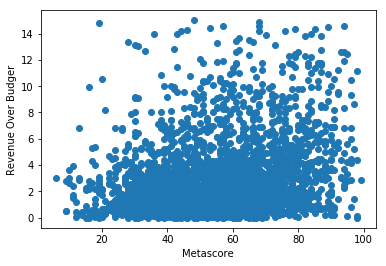

In [5]:
plt.scatter(X, y)
plt.xlabel("Metascore")
plt.ylabel("Revenue Over Budger")

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {round(mse, 4)}")
print(f"R-squared (R2 ): {round(r2,4)}")

Mean Squared Error (MSE): 6.8121
R-squared (R2 ): 0.0686


In [10]:
model.score(X_test, y_test)

0.06863330320601202

Text(0.5, 1.0, 'Box Office Performance vs. Metascore')

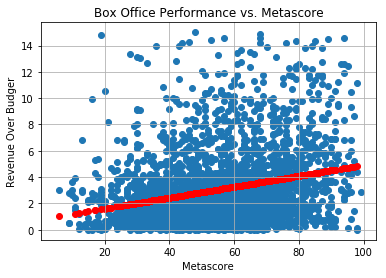

In [11]:
plt.scatter(X, y)
plt.xlabel("Metascore")
plt.ylabel("Revenue Over Budger")
plt.scatter(X_test, predicted, color = 'red')
plt.grid(True)
plt.title('Box Office Performance vs. Metascore')